# **Youtube**

## **Imports/Package Downloads**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import nltk
from nltk.corpus import words
nltk.download('punkt')
nltk.download('words')
nltk.download('vader_lexicon')
!pip install textacy

from textacy.preprocessing.replace import urls, hashtags, numbers, emails, emojis, currency_symbols
from nltk.sentiment.vader import SentimentIntensityAnalyzer

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


## **Import Dataset**

In [ ]:
youtube_comments = pd.read_csv('/content/drive/MyDrive/DSO 560 Group Project/Codes/youtube_comments.csv')

In [ ]:
youtube_comments.head()

,Timestamp,Username,VideoID,Comment,Date
0,2024-04-15T13:36:30Z,@andyamg94,DgMJq67ZOwE,Start: 7:55\n\nFinale: 28:26,2024-04-15T14:10:46Z
1,2024-04-15T03:48:36Z,@bossanova186,DgMJq67ZOwE,amei,2024-04-15T03:48:36Z
2,2024-04-14T19:17:15Z,@dreaclark1078,DgMJq67ZOwE,So we’re not gonna talk about Freddie Mercy pe...,2024-04-14T19:45:25Z
3,2024-04-14T16:45:59Z,@dongmingim,DgMJq67ZOwE,Ok I should return to France because everythin...,2024-04-14T16:45:59Z
4,2024-04-14T15:27:11Z,@outofomelas,DgMJq67ZOwE,My goodness…. <3,2024-04-14T15:27:11Z


## **Text Cleaning**

In [ ]:
youtube_comments_df = pd.DataFrame(youtube_comments)

In [ ]:
final_youtube_comments_df = youtube_comments_df.drop(['Timestamp','Username',	'VideoID',	'Date'], axis=1)
final_youtube_comments_df

,Comment
0,Start: 7:55\n\nFinale: 28:26
1,amei
2,So we’re not gonna talk about Freddie Mercy pe...
3,Ok I should return to France because everythin...
4,My goodness…. <3
...,...
3032,The influence of Brassaï is at the core of thi...
3033,yes it reminds me toulouse lautrec's brothel p...
3034,GORGEOUS!
3035,best show in over a decade wow


In [ ]:
pattern = r'[^a-zA-Z0-9\s]'  # Keep only letters, numbers, and whitespace

mask = final_youtube_comments_df['Comment'].str.contains(pattern)
final_youtube_comments_df = final_youtube_comments_df[~mask]

final_youtube_comments_df

,Comment
1,amei
8,lucky me
10,fantastic
11,GOOSEBUMPS WHAT A SHOW
12,As much as I enjoyed this the classism that re...
...,...
3008,you need ck
3013,Galliano has done these dramatic types of pres...
3022,Masterpiece
3031,And Toulouse Lautrec again


## **Stopword Removal**

In [ ]:
nltk.download('stopwords')
nltk.download('punkt')
from collections import Counter
from nltk.corpus import stopwords
import string

# Define stopwords and punctuation
stop_words = set(stopwords.words('english'))
punctuation = set(string.punctuation)

# Function to preprocess text
def preprocess_text(text):
    # Convert text to lowercase
    text = text.lower()
    # Tokenize the text into words
    words = nltk.word_tokenize(text)
    # Remove stopwords and punctuation
    words = [word for word in words if word not in stop_words and word not in punctuation]
    return words


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


## **Word Count Frequency**

In [ ]:

# Apply the preprocessing function to each comment and update word frequencies
word_freq = Counter()
final_youtube_comments_df['Comment'].apply(lambda x: word_freq.update(preprocess_text(x)))

# Create a DataFrame from the word frequency Counter
word_freq_df = pd.DataFrame(word_freq.items(), columns=['word', 'frequency'])

# Display the frequency table
(word_freq_df)


,word,frequency
0,amei,1
1,lucky,6
2,fantastic,1
3,goosebumps,1
4,show,42
...,...,...
689,presentations,1
690,runways,1
691,1990s,1
692,toulouse,1


In [ ]:
#Find the top 30 words

top_30_word = word_freq_df.sort_values(by='frequency', ascending=False).head(30)

# Style the DataFrame for visualization
styled_df = top_30_word.style.background_gradient(cmap='viridis')\
                        .set_properties(**{'font-size': '12pt', 'font-family': 'Calibri'})\
                        .set_caption("Top 30 Words by Frequency")\
                        .set_table_styles([{'selector': 'caption',
                                            'props': [('color', 'black'),
                                                      ('font-size', '16pt')]}])
styled_df

,word,frequency
4,show,42
9,fashion,21
17,wow,20
188,amazing,19
104,back,18
172,art,17
37,galliano,17
115,love,17
108,bravo,13
65,best,13


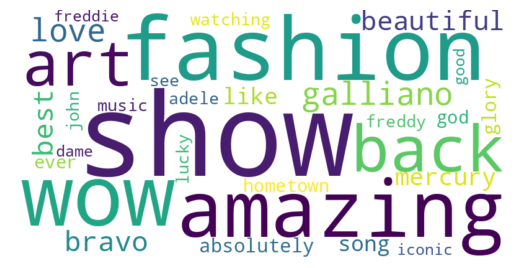

In [ ]:
import matplotlib.pyplot as plt

from wordcloud import WordCloud

word_freq = dict(zip(top_30_word['word'], top_30_word['frequency']))

wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

## **Vader**

In [ ]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize
# Download required NLTK data
nltk.download('vader_lexicon')
nltk.download('punkt')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
sid = SentimentIntensityAnalyzer()


In [ ]:


final_youtube_comments_df['Sentiment Score'] = final_youtube_comments_df['Comment'].apply(lambda x: get_sentence_vader_scores(x)['compound'])

# Tokenize each comment into sentences
final_youtube_comments_df['sentence'] = final_youtube_comments_df['Comment'].apply(lambda x: sent_tokenize(x))

# Tokenize each comment into words
final_youtube_comments_df['word'] = final_youtube_comments_df['Comment'].apply(lambda x: word_tokenize(x))

final_youtube_comments_df

<ipython-input-45-6a32fd987a83>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_youtube_comments_df['Sentiment Score'] = final_youtube_comments_df['Comment'].apply(lambda x: get_sentence_vader_scores(x)['compound'])
<ipython-input-45-6a32fd987a83>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_youtube_comments_df['sentence'] = final_youtube_comments_df['Comment'].apply(lambda x: sent_tokenize(x))
<ipython-input-45-6a32fd987a83>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy

,Comment,Sentiment Score,sentence,word
1,amei,0.0000,[amei],[amei]
8,lucky me,0.4215,[lucky me],"[lucky, me]"
10,fantastic,0.5574,[fantastic],[fantastic]
11,GOOSEBUMPS WHAT A SHOW,0.0000,[GOOSEBUMPS WHAT A SHOW],"[GOOSEBUMPS, WHAT, A, SHOW]"
12,As much as I enjoyed this the classism that re...,-0.0258,[As much as I enjoyed this the classism that r...,"[As, much, as, I, enjoyed, this, the, classism..."
...,...,...,...,...
3008,you need ck,0.0000,[you need ck],"[you, need, ck]"
3013,Galliano has done these dramatic types of pres...,0.0000,[Galliano has done these dramatic types of pre...,"[Galliano, has, done, these, dramatic, types, ..."
3022,Masterpiece,0.6249,[Masterpiece],[Masterpiece]
3031,And Toulouse Lautrec again,0.0000,[And Toulouse Lautrec again],"[And, Toulouse, Lautrec, again]"


In [ ]:
final_youtube_comments_df #Tokenization

,Comment,Sentiment Score,sentence,word
1,amei,0.0000,[amei],[amei]
8,lucky me,0.4215,[lucky me],"[lucky, me]"
10,fantastic,0.5574,[fantastic],[fantastic]
11,GOOSEBUMPS WHAT A SHOW,0.0000,[GOOSEBUMPS WHAT A SHOW],"[GOOSEBUMPS, WHAT, A, SHOW]"
12,As much as I enjoyed this the classism that re...,-0.0258,[As much as I enjoyed this the classism that r...,"[As, much, as, I, enjoyed, this, the, classism..."
...,...,...,...,...
3008,you need ck,0.0000,[you need ck],"[you, need, ck]"
3013,Galliano has done these dramatic types of pres...,0.0000,[Galliano has done these dramatic types of pre...,"[Galliano, has, done, these, dramatic, types, ..."
3022,Masterpiece,0.6249,[Masterpiece],[Masterpiece]
3031,And Toulouse Lautrec again,0.0000,[And Toulouse Lautrec again],"[And, Toulouse, Lautrec, again]"


In [ ]:
def get_sentence_vader_scores(sentence):
    return sid.polarity_scores(sentence)

# Create a list to hold the new rows
rows_list = []

# Iterate over each row in the original DataFrame
for index, row in final_youtube_comments_df.iterrows():
    for sentence in row['sentence']:
        vader_scores = get_sentence_vader_scores(sentence)
        rows_list.append({
            'Sentence': sentence,
            'Compound': vader_scores['compound'],
            'Positive': vader_scores['pos'],
            'Neutral': vader_scores['neu'],
            'Negative': vader_scores['neg']
        })

# Create a new DataFrame from the list of rows
df_sentence_sentiment = pd.DataFrame(rows_list)
(df_sentence_sentiment)

,Sentence,Compound,Positive,Neutral,Negative
0,amei,0.0000,0.000,1.000,0.000
1,lucky me,0.4215,0.737,0.263,0.000
2,fantastic,0.5574,1.000,0.000,0.000
3,GOOSEBUMPS WHAT A SHOW,0.0000,0.000,1.000,0.000
4,As much as I enjoyed this the classism that re...,-0.0258,0.152,0.691,0.157
...,...,...,...,...,...
412,you need ck,0.0000,0.000,1.000,0.000
413,Galliano has done these dramatic types of pres...,0.0000,0.000,1.000,0.000
414,Masterpiece,0.6249,1.000,0.000,0.000
415,And Toulouse Lautrec again,0.0000,0.000,1.000,0.000


## **Sentiment Variation**

In [ ]:
df_sentence_sentiment = pd.DataFrame(rows_list)

print(df_sentence_sentiment)

# Aggregate sentiments for the entire comment
final_youtube_comments_df['Compound'] = final_youtube_comments_df['Comment'].apply(lambda x: sid.polarity_scores(x)['compound'])
final_youtube_comments_df['Sentiment'] = final_youtube_comments_df['Compound'].apply(lambda x: 'positive' if x > 0 else ('negative' if x < 0 else 'neutral'))

sentiment_counts = final_youtube_comments_df['Sentiment'].value_counts()

                                              Sentence  Compound  Positive  \
0                                                 amei    0.0000     0.000   
1                                             lucky me    0.4215     0.737   
2                                            fantastic    0.5574     1.000   
3                               GOOSEBUMPS WHAT A SHOW    0.0000     0.000   
4    As much as I enjoyed this the classism that re...   -0.0258     0.152   
..                                                 ...       ...       ...   
412                                        you need ck    0.0000     0.000   
413  Galliano has done these dramatic types of pres...    0.0000     0.000   
414                                        Masterpiece    0.6249     1.000   
415                         And Toulouse Lautrec again    0.0000     0.000   
416                     best show in over a decade wow    0.8402     0.667   

     Neutral  Negative  
0      1.000     0.000  
1      0.263 

<ipython-input-49-9eee0b6ddc50>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_youtube_comments_df['Compound'] = final_youtube_comments_df['Comment'].apply(lambda x: sid.polarity_scores(x)['compound'])
<ipython-input-49-9eee0b6ddc50>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_youtube_comments_df['Sentiment'] = final_youtube_comments_df['Compound'].apply(lambda x: 'positive' if x > 0 else ('negative' if x < 0 else 'neutral'))


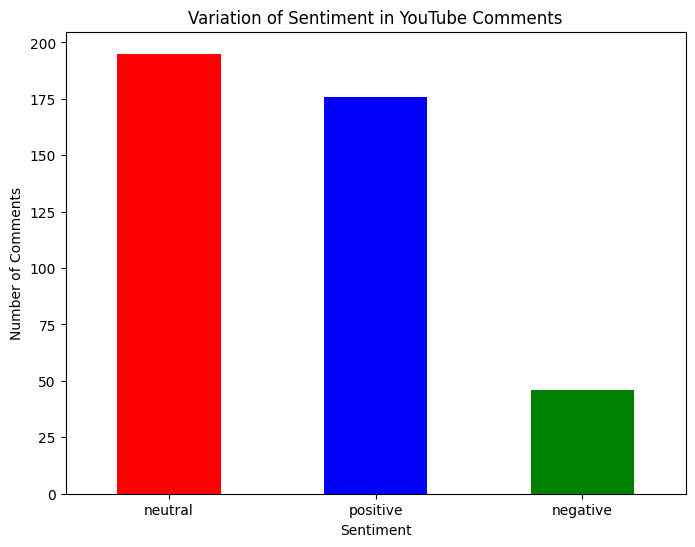

In [ ]:

# Plot the bar chart
plt.figure(figsize=(8, 6))
sentiment_counts.plot(kind='bar', color=['red', 'blue', 'green'])
plt.title('Variation of Sentiment in YouTube Comments')
plt.xlabel('Sentiment')
plt.ylabel('Number of Comments')
plt.xticks(rotation=0)
plt.show()


# **Reddit**

In [ ]:
!pip install praw

ERROR: Operation cancelled by user
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/pip/_vendor/pkg_resources/__init__.py", line 3108, in _dep_map
    return self.__dep_map
  File "/usr/local/lib/python3.10/dist-packages/pip/_vendor/pkg_resources/__init__.py", line 2901, in __getattr__
    raise AttributeError(attr)
AttributeError: _DistInfoDistribution__dep_map

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/cli/base_command.py", line 169, in exc_logging_wrapper
    status = run_func(*args)
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/cli/req_command.py", line 242, in wrapper
    return func(self, options, args)
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/commands/install.py", line 441, in run
    conflicts = self._determine_conflicts(to_install)
  File "/usr/local/lib/python3.10/dist-packages/pip/_i

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



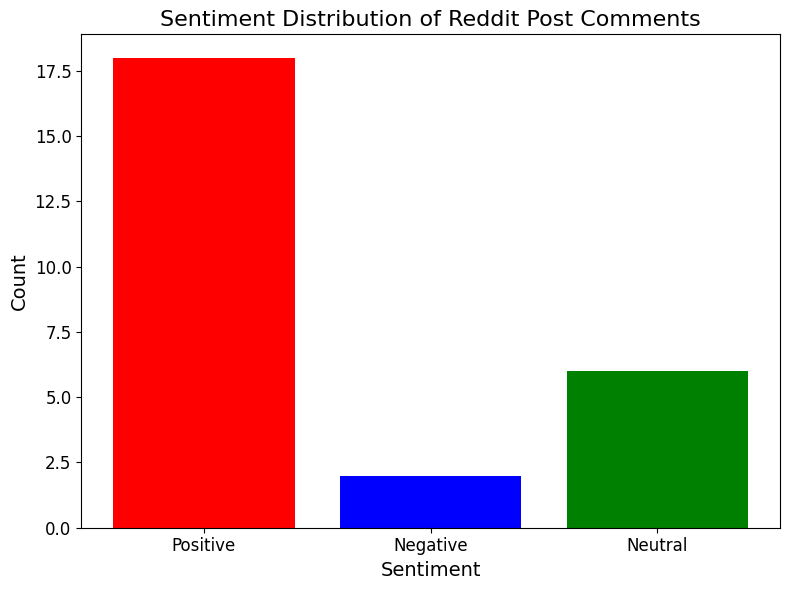

In [ ]:
import praw
from textblob import TextBlob
import matplotlib.pyplot as plt

# Define your Reddit API credentials and user agent
client_id = "2PwV1rNYkkyR6pFANEdH7w"
client_secret = "206BYhXgQfVwzZpIfCdsMmbgGqnF0g"
user_agent = "FashionScraper/1.0 by kaykayd1061"

# Authenticate with Reddit API using OAuth2
reddit = praw.Reddit(
    client_id=client_id,
    client_secret=client_secret,
    user_agent=user_agent
)

# Specify the URL of the Reddit post you want to scrape
post_url = "https://www.reddit.com/r/whatthefrockk/comments/1ad8k4x/maison_margiela_artisanal_couture_spring_2024/"

# Fetch the Reddit post and its comments using the URL
submission = reddit.submission(url=post_url)

# Lists to store sentiment polarities
positive_sentiments = []
negative_sentiments = []
neutral_sentiments = []

# Iterate through the comments of the post and perform sentiment analysis
for comment in submission.comments:
    text = comment.body
    polarity = TextBlob(text).sentiment.polarity
    if polarity > 0:
        positive_sentiments.append(polarity)
    elif polarity < 0:
        negative_sentiments.append(polarity)
    else:
        neutral_sentiments.append(polarity)

# Count the number of positive, negative, and neutral sentiments
positive_count = len(positive_sentiments)
negative_count = len(negative_sentiments)
neutral_count = len(neutral_sentiments)

# Plotting the pie chart with aesthetic improvements
labels = ['Positive', 'Negative', 'Neutral']
counts = [positive_count, negative_count, neutral_count]
colors = ['red', 'blue', 'green']  # Toned down color scheme

plt.figure(figsize=(8, 6))
plt.bar(labels, counts, color=colors)
plt.title('Sentiment Distribution of Reddit Post Comments', fontsize=16)
plt.xlabel('Sentiment', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()  # Adjust layout to prevent cropping of labels
plt.show()
